In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
seed = 578924431 # For an unbalanced sub-set, set seed to 42. Properly balanced subset: 578924431

from sklearn.decomposition import PCA

# Creating a balanced subset of the combinatory library

When optimising a genetically engineered machine, there are a lot of parts of this machine that could possibly be optimized. One strategy on deciding whether to 



In [20]:
# Listing the the number of variables and creating the associated indeces:
num_strains = 4
indeces_strains = np.array(range(1,num_strains+1))
num_promoters = 10
indeces_promoters = np.array(range(num_strains+1, num_strains+num_promoters+1))
num_secretion_signals = 4
indeces_secretion = np.array(range(num_strains+num_promoters+1, num_strains+num_promoters+num_secretion_signals+1))
num_genes = 4
indeces_genes = np.array(range(num_strains+num_promoters+num_secretion_signals+1, num_strains+num_promoters+num_secretion_signals+num_genes+1))


num_combinations = num_strains*num_genes*num_promoters*num_secretion_signals

print(f'Size combinatorial library: {num_combinations}')

Size combinatorial library: 640


In [21]:
print(indeces_strains)
print(indeces_promoters)
print(indeces_secretion)
print(indeces_genes)

[1 2 3 4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18]
[19 20 21 22]


In [22]:
# Iteratively initialize the combinatory library 

def init_comb_library(size):
    comb_library = [np.zeros(0) for i in range(size)]
    i = 0
    for idx1 in indeces_strains:
        for idx2 in indeces_promoters:
            for idx3 in indeces_secretion:
                for idx4 in indeces_genes:
                    comb_library[i] = [idx1, idx2, idx3, idx4]
                    i += 1
    return comb_library

In [23]:
# Initializing the set of constructs
np.random.seed(seed)
percentage_comb_library = 10

num_constructs = int(np.rint(num_combinations/(100/percentage_comb_library)))

# Initializing the entire combinational library
comb_library = init_comb_library(num_combinations)

construct_indeces = np.random.choice(range(num_combinations), num_constructs, replace=False)
constructs = [comb_library[i] for i in construct_indeces]
constructs = np.array(constructs)
print(f'{num_constructs}')

print(f'First five constructs:')
print(constructs[:5])

# Firt, name each construct:
names = ['#'+str(i).zfill(2) for i in range(1, num_constructs+1)]
named_strains = pd.DataFrame(constructs, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
named_strains['Line name'] = names


64
First five constructs:
[[ 2  6 16 22]
 [ 4 11 18 19]
 [ 1  5 16 19]
 [ 1 11 18 19]
 [ 3  8 16 22]]


# Exporting the subset to a .csv file

In [24]:

newdf = pd.DataFrame(np.repeat(named_strains.values,3,axis=0))
newdf.columns = named_strains.columns
newdf['Replicate'] = ['r0', 'r1', 'r2']*num_constructs # creating entries for each replicate
newdf['activity'] = '_' # creating an empty cell for the actual measurement.
print(newdf)

# Setting the line name, replicate number and measurement value as first columns in the dataframe
cols = newdf.columns.tolist()
cols = cols[-3:] + cols[:-3]
named_strains = newdf[cols] 

#print(temp_df)
print(named_strains)
named_strains.to_csv('Sample_list.csv', sep=',', index=False)

    str_idx pro_idx sec_idx gen_idx Line name Replicate activity
0         2       6      16      22       #01        r0        _
1         2       6      16      22       #01        r1        _
2         2       6      16      22       #01        r2        _
3         4      11      18      19       #02        r0        _
4         4      11      18      19       #02        r1        _
..      ...     ...     ...     ...       ...       ...      ...
187       1      12      16      21       #63        r1        _
188       1      12      16      21       #63        r2        _
189       4       6      18      19       #64        r0        _
190       4       6      18      19       #64        r1        _
191       4       6      18      19       #64        r2        _

[192 rows x 7 columns]
    Line name Replicate activity str_idx pro_idx sec_idx gen_idx
0         #01        r0        _       2       6      16      22
1         #01        r1        _       2       6      16      22
2

In [25]:
# Creating mock data for the testing of the ART

np.random.seed(seed)

mock_data = named_strains.copy()
mock_data['measurement'] = np.random.random(mock_data.shape[0])
print(mock_data)

mock_data.to_csv('mock_data.csv', sep=',', index=False)

    Line name Replicate activity str_idx pro_idx sec_idx gen_idx  measurement
0         #01        r0        _       2       6      16      22     0.829131
1         #01        r1        _       2       6      16      22     0.333064
2         #01        r2        _       2       6      16      22     0.871142
3         #02        r0        _       4      11      18      19     0.937158
4         #02        r1        _       4      11      18      19     0.054991
..        ...       ...      ...     ...     ...     ...     ...          ...
187       #63        r1        _       1      12      16      21     0.101024
188       #63        r2        _       1      12      16      21     0.448711
189       #64        r0        _       4       6      18      19     0.153779
190       #64        r1        _       4       6      18      19     0.711719
191       #64        r2        _       4       6      18      19     0.680596

[192 rows x 8 columns]


## We had to drop a few samples. We decided to drop samples:
6
11
3
14
4
15
18
20
36


In [26]:
# constructs = constructs[:60]

names = ['#'+str(i).zfill(2) for i in range(1, num_constructs+1)]
named_samples = pd.DataFrame(constructs, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
named_samples['Line name'] = names
named_samples = named_samples.set_index('Line name')
# Drop rows for multiple countries:
list_of_droppable_samples = ["#06", "#11", "#03", "#14", "#04", "#15", "#18", "#20", "#36"]
np.random.seed(seed)
dropped_samples = np.random.choice(list_of_droppable_samples, 3, replace=False)
dropped_samples = np.append("#07", dropped_samples)
dropped_samples = np.append(["#64","#62", "#48"], dropped_samples)
print(dropped_samples)
named_samples = named_samples.drop(dropped_samples)
print(named_samples)

['#64' '#62' '#48' '#07' '#36' '#03' '#04']
           str_idx  pro_idx  sec_idx  gen_idx
Line name                                    
#01              2        6       16       22
#02              4       11       18       19
#05              3        8       16       22
#06              2       11       17       19
#08              3        8       15       22
#09              4       11       15       22
#10              2        8       16       22
#11              2        5       15       21
#12              3       11       15       19
#13              4       13       16       22
#14              1       14       16       20
#15              1        6       18       19
#16              2       13       15       21
#17              4        7       18       19
#18              1       13       18       20
#19              3        7       15       21
#20              1       11       18       20
#21              2       10       16       22
#22              2       14       16

In [27]:
print(len(named_samples["str_idx"]))

57


Text(0.5, 1.0, 'Distribution of genes')

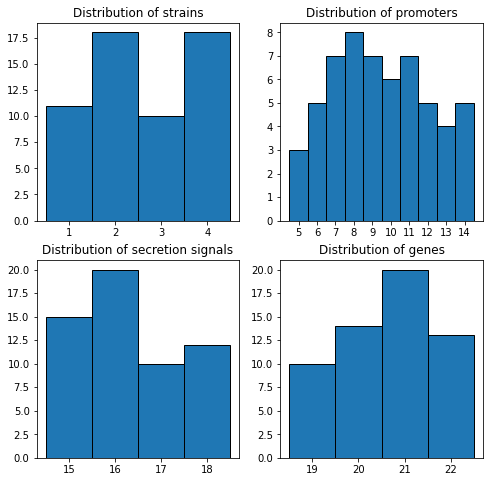

In [28]:
# Plotting the occurances of each part withing the selected constructs

fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0][0].hist(named_samples["str_idx"], align='mid', bins=np.append(indeces_strains,5)-0.5, edgecolor = 'black')
axs[0][0].set_xticks(indeces_strains)
axs[0][0].set_title('Distribution of strains')
axs[0][1].hist(named_samples["pro_idx"], align='mid', bins=np.append(indeces_promoters,15)-0.5, edgecolor = 'black')
axs[0][1].set_xticks(indeces_promoters)
axs[0][1].set_title('Distribution of promoters')
axs[1][0].hist(named_samples["sec_idx"], align='mid', bins=np.append(indeces_secretion,19)-0.5, edgecolor = 'black')
axs[1][0].set_title('Distribution of secretion signals')
axs[1][1].hist(named_samples["gen_idx"], align='mid', bins=np.append(indeces_genes,23)-0.5, edgecolor = 'black')
axs[1][1].set_title('Distribution of genes')

In [29]:
# Tranforming the 2d array into a one-hot-encoded panda.DataFrame

# df = pd.DataFrame(constructs, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
# print(df.head())
strains_art_oneh = pd.get_dummies(data=named_samples, columns=['str_idx', 'pro_idx', 'sec_idx', 'gen_idx'])
strains_art_oneh.head()

,str_idx_1,str_idx_2,str_idx_3,str_idx_4,pro_idx_5,pro_idx_6,pro_idx_7,pro_idx_8,pro_idx_9,pro_idx_10,...,pro_idx_13,pro_idx_14,sec_idx_15,sec_idx_16,sec_idx_17,sec_idx_18,gen_idx_19,gen_idx_20,gen_idx_21,gen_idx_22
Line name,,,,,,,,,,,,,,,,,,,,,
#01,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
#02,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
#05,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
#06,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
#08,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [78]:
## If handling different measurement types, first normalise the data. Should not be necessary if everything is one-hot encoded

# from sklearn.preprocessing import StandardScaler

# strains_art_oneh = StandardScaler().fit_transform(strains_art_oneh) # normalizing the features
# print(strains_art_oneh.shape)

# print(np.mean(strains_art_oneh),np.std(strains_art_oneh))
# print(strains_art_oneh[:5])

(90, 26)
-1.3474501666390789e-17 1.0
[[-0.4108907  -0.31234752 -0.4472136  -0.24253563 -0.35355339  2.67989145
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339 -0.4108907
  -0.33333333 -0.35355339  4.12310563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613 -0.65465367 -0.5
  -0.53452248  1.61245155]
 [-0.4108907  -0.31234752  2.23606798 -0.24253563 -0.35355339 -0.37314944
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339  2.43373723
  -0.33333333 -0.35355339 -0.24253563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613 -0.65465367 -0.5
  -0.53452248  1.61245155]
 [-0.4108907  -0.31234752 -0.4472136  -0.24253563 -0.35355339  2.67989145
  -0.46499055 -0.39223227 -0.26726124 -0.33333333 -0.35355339 -0.4108907
  -0.33333333 -0.35355339  4.12310563 -0.33333333 -0.31234752 -0.37314944
   1.52752523 -0.5        -0.63737744 -0.51730613  1.52752523 -0.5
  -0.53452248 -0.62017367]
 [-0.4108907  -0.

In [30]:
# Starting the Principal Componant Analysis in order to determine wether each part adds sufficient variablity 
# to the set of selceted constructs

number_of_PCA_components = 20 # Select the number of principal components you with to analyse. Set to 8+10+4+4=26 to include all variability

pca_constructs = PCA(n_components=number_of_PCA_components)
principalComponents_constructs = pca_constructs.fit_transform(strains_art_oneh) 

print(f"sum of all components: {np.sum(pca_constructs.explained_variance_ratio_)}") # A measure of how much variability is included in the PCA. If 1.0, all variability is included
print(pca_constructs.explained_variance_ratio_) # Shows how much each PC contributes to the total amount of variability

eigenvalues = pca_constructs.components_ # Extracts the influence of each variable on each principle component

contributions_pca = (abs(eigenvalues)*100) / abs(eigenvalues).sum(axis=1, keepdims=True) # Expresses the contribution of each variable to a PC in percentages

#print(contributions_pca)
contributions_pca = pd.DataFrame(contributions_pca, columns = strains_art_oneh.columns)
print(np.sum(contributions_pca.iloc[0])) # Shows that the sum of the influence of each variable on the first PC is equal to 100% 
print(contributions_pca.iloc[0]) # Shows the relative influence of each variable on the first PC

sum of all components: 1.0
[1.39320302e-01 1.23736787e-01 1.11289014e-01 1.02127633e-01
 7.86369288e-02 6.78039123e-02 5.85470219e-02 4.87412451e-02
 4.61098376e-02 4.03980372e-02 3.55126561e-02 3.02321343e-02
 2.74886002e-02 2.65643582e-02 2.15825822e-02 1.54656882e-02
 1.45263713e-02 1.19168905e-02 2.00476935e-32 7.42789922e-33]
99.99999999999999
str_idx_1      5.189019
str_idx_2     10.060894
str_idx_3      3.239546
str_idx_4     12.010367
pro_idx_5      0.581014
pro_idx_6      0.520794
pro_idx_7      2.432102
pro_idx_8      2.011238
pro_idx_9      0.733278
pro_idx_10     2.544345
pro_idx_11     4.570231
pro_idx_12     2.043748
pro_idx_13     1.555645
pro_idx_14     0.718166
sec_idx_15    11.666930
sec_idx_16    12.026968
sec_idx_17     0.293571
sec_idx_18     0.653609
gen_idx_19     9.623501
gen_idx_20     1.329050
gen_idx_21    12.245218
gen_idx_22     3.950767
Name: 0, dtype: float64


In [31]:
# Obtain the percentage of variance originating from each variable by calculating the dot product between: 
# - the explained variance ratio of each PC 
# - how much each variable contributed to that PC

perc_var_per_parameter = np.dot(pca_constructs.explained_variance_ratio_, contributions_pca)


print(perc_var_per_parameter) # How much each variable contributed to the total variance in percentages
       
print(np.sum(perc_var_per_parameter)) # The sum of all percentages. Should be 100% if number_of_PCA_components=26

[4.98127257 6.42606965 5.09922094 6.12395326 2.26153372 3.37852681
 4.10662679 3.5206114  3.87101163 3.75118126 4.51288389 2.931597
 2.46123866 3.64476348 5.67551389 5.75497952 4.48578313 5.0624958
 5.12489699 5.37705123 5.50526258 5.94352581]
99.99999999999999


Text(0.5, 1.0, 'Variance attributed to each gene')

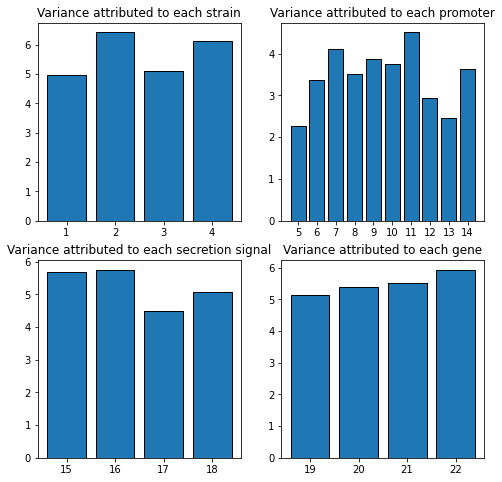

In [32]:
# Creating a bar plot of contribution of each variable to the total variance in perentages
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0][0].bar(indeces_strains, perc_var_per_parameter[indeces_strains-1], edgecolor = 'black')
axs[0][0].set_xticks(indeces_strains)
axs[0][0].set_title('Variance attributed to each strain')
axs[0][1].bar(indeces_promoters, perc_var_per_parameter[indeces_promoters-1], edgecolor = 'black')
axs[0][1].set_xticks(indeces_promoters)
axs[0][1].set_title('Variance attributed to each promoter')
axs[1][0].bar(indeces_secretion, perc_var_per_parameter[indeces_secretion-1], edgecolor = 'black')
axs[1][0].set_title('Variance attributed to each secretion signal')
axs[1][1].bar(indeces_genes, perc_var_per_parameter[indeces_genes-1], edgecolor = 'black')
axs[1][1].set_title('Variance attributed to each gene')